# Wrangle and Analyze data 
### WeRateDogs tweets

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import datetime
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt

<hr>

## Step 1: Data Gathering

### 1. WeRateDogs Twitter Archive

In [3]:
# Twitter Archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. URL Image Predections

In [4]:
# Use request library to download tsv file
# Image predection URL
url_img_pred = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url_img_pred) 
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)    
    
# read tsv file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Tweets JSON file

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

**I used local file since I have error in developer account**

In [6]:
# Save only certain tweet elements in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count']
# Later convert list to dataframe
data = []

# From dictionary list to list
with open('tweet-json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        tweet_json = readfile.readline()
        
            
tweets_info = pd.DataFrame.from_dict(data)

<hr>

## Step 2: Data Assesing

### 1. WeRateDogs Twitter Archive

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> **Observations:**<br>
1. Twitter Archive data has 2356 rows and 17 columns.
2. "tweet_id", "in_reply_to_status_id" and "in_reply_to_user_id" have int/float data type.
3. "timestamp" has an object data type.
4. "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" are unneccarely fot this project.

In [9]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> **Observation:**
    - No duplicated values.

In [10]:
#View dogs names
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Bailey         7
an             7
Toby           7
Buddy          7
Milo           6
Koda           6
Jack           6
Rusty          6
Oscar          6
Dave           6
Jax            6
Leo            6
Bella          6
Scout          6
Stanley        6
Gus            5
            ... 
Superpup       1
Leonard        1
Mabel          1
Kaiya          1
Yoda           1
Tuck           1
Miguel         1
Chesney        1
Jordy          1
Rilo           1
Chase          1
Glacier        1
Carll          1
Grey           1
Kody           1
Eugene         1
Pippin         1
Blipson        1
Butters        1
Billl          1
Mo             1
Walker         1
Maisey         1
Ben            1
Ralpher        1
Kloey          1
Ester          1
Stephanus     

> **Observation:**
    - Some of these names are uncorrect, and we can notice they start with small letters.

### 2. URL Image Predections

In [11]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> **Observations:**<br>
1. Image Predectionn data has 2075 rows and 12 columns.
2. "tweet_id" has int data type.

### 3. Tweets JSON file

In [13]:
tweets_info

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


In [14]:
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


> **Observations:**<br>
1. Tweets Info data has 2354 rows and 3 columns.
2. "id" could be more clear.
3. "id" has int data type.
4. "id" is not the first column.

## Assesmnet Summary

### Quality
**Twitter Archive Data:**<br>
1. "tweet_id", "in_reply_to_status_id", "in_reply_to_user_id" have int/float data type.
2. "timestamp" has an object data type.
3. "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" are unnecessary for this project.
4. Some of these names are uncorrect.
5. "id" could be more clear in "tweets_info" data.
6. "id" in  is not the first column in "tweets_info" data.
7. Incorrect values in rating numerators in "twitter_archive" data.

### Tidiness
1. Three datasets can be merged in one table.
2. Dog stages need to be combined into one column

<hr>

## Step 3: Cleaning

In [15]:
# copy the data before cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_info_clean = tweets_info.copy()

### Quality 

### POINT 1

#### Define
"tweet_id", "in_reply_to_status_id" and "in_reply_to_user_id" have int/float data type. So, it should be converted to string.

#### Code

In [16]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('str')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('str')
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')
tweets_info_clean['id'] = tweets_info_clean['id'].astype('str')

#### Test

In [17]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2),

### POINT 2

#### Define
"timestamp" has an object data type. So it will be converted to datetime.

#### Code

In [18]:
print(twitter_archive_clean['timestamp'].head())

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object


In [19]:
#remove additional zeros and convert 
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'].str[:-6], infer_datetime_format=True)

#### Test

In [20]:
print(twitter_archive_clean['timestamp'].head())

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]


### POINT 3

#### Define
"retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" are unneccarely for this project. So, I will drop there rows first (the rows that have a value in this fields), then drop these columns.

#### Code

In [21]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.retweeted_status_id).isnull()]

In [22]:
twitter_archive.drop(columns=["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], inplace=True)

#### Test

In [23]:
twitter_archive_clean[~(twitter_archive_clean.retweeted_status_id).isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), 

### POINT 4

#### Define
Some of these names are uncorrect, and we can notice they start with small letters. So we will delete them.

#### Code

In [25]:
twitter_archive_clean.name.replace(to_replace = ['a','all','an','by','his','my','just','this','the'], value=None, inplace=True)

#### Test

In [26]:
#View dogs names
twitter_archive_clean['name'].value_counts()

None         714
Oliver        12
Lucy          11
Charlie       11
Cooper        10
Tucker         9
Penny          9
Lola           8
Daisy          8
Sadie          8
Winston        8
Stanley        7
Toby           7
Bella          6
Koda           6
Oscar          6
Bo             6
Jax            6
Bailey         6
Scout          5
Rusty          5
Bentley        5
Dave           5
Louis          5
Leo            5
Milo           5
Buddy          5
Chester        5
Jerry          4
Dexter         4
            ... 
Iroh           1
Franq          1
Erik           1
Zuzu           1
Kloey          1
Ben            1
Davey          1
Maisey         1
Margo          1
Scruffers      1
Malikai        1
Terrenth       1
Lance          1
Ginger         1
Geoff          1
Orion          1
Godi           1
Rilo           1
Chase          1
Glacier        1
Kenny          1
Kody           1
Eugene         1
Pippin         1
Edgar          1
Jordy          1
Butters        1
Mo            

### POINT 5

#### Define
"id" could be more clear. So rename it to "tweet_id"

#### Code

In [27]:
tweets_info_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [28]:
tweets_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### POINT 6

#### Define
"id" is not the first column.

#### Code

In [29]:
tweets_info_clean = tweets_info_clean[['tweet_id', 'favorite_count', 'retweet_count']]

#### Test

In [30]:
tweets_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### POINT 7

#### Define
Incorrect values in rating numerators in "twitter_archive" data.

#### Code

In [35]:
#change numerator type to float
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


#### Test

In [34]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


### Tidiness - Merge three data frames to one data frame

### POINT 1

#### Code

In [57]:
# Firstly, merge tweets_info to twitter_archive
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_info_clean, on='tweet_id', how='left')

# Secondly, merge image_predictions to twitter_archive
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='left')

#### Test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 30 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
favorite_count             

### POINT 2

#### Define
Dog stages need to be combined into one column

#### Code

In [59]:
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_stay = [x for x in twitter_archive_clean.columns.tolist() if x not in columns_to_melt]

twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = columns_to_stay, value_vars = columns_to_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

twitter_archive_clean.drop(['stages'], axis=1, inplace=True)

#### Test

In [60]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage']

<hr>

## Step 4: Storing Data

In [66]:
#Save the cleaned data into new csv file
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)
twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')

## Step 5: Analyzing and Visualizing

In [67]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 27 columns):
tweet_id                      8700 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     8700 non-null object
source                        8700 non-null object
text                          8700 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 8468 non-null object
rating_numerator              8700 non-null int64
rating_denominator            8700 non-null int64
name                          8700 non-null object
favorite_count                8700 non-null int64
retweet_count                 8700 non-null int64
jpg_url                       7976 non-null object
img_num                       7976 non-null float64
p1                            7976 n

### Largest and Smallest Rated Dog

**Largest**

In [80]:
twitter_archive_clean.nlargest(1,'rating_numerator')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
804,749981277374128128,NaN,NaN,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,...,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,None


In [81]:
twitter_archive_clean.nlargest(1,'rating_numerator')['jpg_url']

804    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

In [82]:
twitter_archive_clean.nlargest(1,'rating_numerator')['retweet_count']

804    2772
Name: retweet_count, dtype: int64

In [83]:
twitter_archive_clean.nlargest(1,'rating_numerator')['favorite_count']

804    5569
Name: favorite_count, dtype: int64

**Smallest**

In [84]:
twitter_archive_clean.nsmallest(1,'rating_numerator')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
265,835152434251116546,NaN,NaN,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,...,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,None


In [85]:
twitter_archive_clean.nsmallest(1,'rating_numerator')['jpg_url']

265    https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
Name: jpg_url, dtype: object

In [86]:
twitter_archive_clean.nsmallest(1,'rating_numerator')['retweet_count']

265    3443
Name: retweet_count, dtype: int64

In [87]:
twitter_archive_clean.nlargest(1,'retweet_count')['retweet_count']

862    79515
Name: retweet_count, dtype: int64

In [88]:
twitter_archive_clean.nsmallest(1,'rating_numerator')['favorite_count']

265    24574
Name: favorite_count, dtype: int64

> Largest rated dog info:
- ID: 749981277374128128
- Pic URL: https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
- Retweet count: 2772.0
- Favorite count: 5569.0

> Smallest rated dog info:
- ID: 835152434251116546
- Pic URL: https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
- Retweet count: 3443.0
- Favorite count: 24574.0


<hr>

### Retweet count 

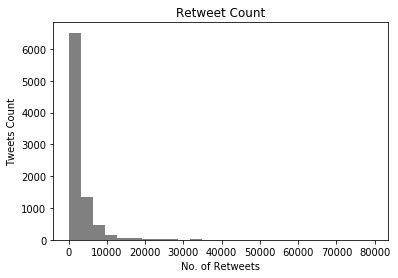

In [89]:
plt.hist(twitter_archive_clean['retweet_count'], bins = 25, color='gray')
plt.title("Retweet Count")
plt.xlabel("No. of Retweets")
plt.ylabel("Tweets Count")
plt.show()

> This is a right-skewed distribution, from this distribution we can notice that most tweets have number of retweets between 0 and 10K.


### Favorite count 

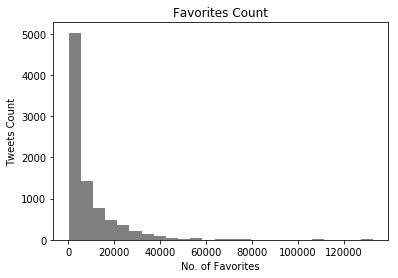

In [90]:
plt.hist(twitter_archive_clean['favorite_count'], bins = 25, color='gray')
plt.title("Favorites Count")
plt.xlabel("No. of Favorites")
plt.ylabel("Tweets Count")
plt.show()

> This is a right-skewed distribution, from this distribution we can notice that most tweets have number of favorites between 0 and 20K.